In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
from vosk import Model
from Signal_Analysis.features.signal import get_HNR
from scipy import signal
from audiostretchy.stretch import stretch_audio
import pandas as pd
import seaborn as sns

# tools work in progress
import tools

reload(tools)

plt.style.use("dark_background")
mpl.rcParams["lines.linewidth"] = 0.5
plt.close("all")

## audio, labels, speech recognition

0 i ------------------- from 0.3000 to 0.4200 sec, confidence: 100.00%
1 skymningen ---------- from 0.4200 to 1.2600 sec, confidence: 100.00%
2 en ------------------ from 1.3500 to 1.5000 sec, confidence: 100.00%
3 mycket -------------- from 1.5000 to 1.8000 sec, confidence: 100.00%
4 het ----------------- from 1.8300 to 2.1000 sec, confidence: 100.00%
5 dag ----------------- from 2.1000 to 2.4300 sec, confidence: 100.00%
6 i ------------------- from 2.4300 to 2.5200 sec, confidence: 100.00%
7 början -------------- from 2.5200 to 2.7900 sec, confidence: 100.00%
8 av ------------------ from 2.7900 to 2.9100 sec, confidence: 100.00%
9 juli ---------------- from 2.9100 to 3.3600 sec, confidence: 100.00%
10 lämnade ------------- from 3.3600 to 3.9900 sec, confidence: 100.00%
11 en ------------------ from 3.9900 to 4.1400 sec, confidence: 100.00%
12 ung ----------------- from 4.1400 to 4.4100 sec, confidence: 100.00%
13 man ----------------- from 4.4100 to 4.6800 sec, confidence: 100.00%
14

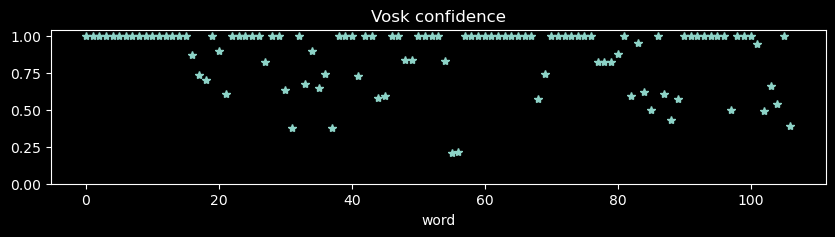

In [2]:
labels_path = (
    "example_speech_Andreas/180923214834-Y20UOTIE-text-000_vowels_timestamp_manual.csv"
 )
#labels_path = "wav_examples/digitala_vowels_manual_timestamps.csv"

labels_df = pd.read_csv(labels_path)
audio_path = "audio_preproc/180923214834-Y20UOTIE-text-000_pp.wav"
#audio_path = "wav_examples/digitala_resurser_sv.wav"
# audio_path = "audio_preproc/digitala_trash2_pp.wav"

Fs, audio = wavfile.read(audio_path)
model_path = "models/vosk-model-small-sv-rhasspy-0.15/"

if "model" not in locals():
    model = Model(model_path)

words = tools.rec_vosk(audio_path, model, print_summary=True)

text = " ".join([w["word"] for w in words])

# get all vowels
for w in words:
    w["vowels"] = tools.checkVowels(w["word"], tools.VOWELS_SV)


print(text)
plt.figure(figsize=(10, 2))
plt.plot([w["conf"] for w in words], "*")
plt.title("Vosk confidence")
plt.xlabel("word")
plt.ylim(bottom=0)
plt.show()

In [3]:
reload(tools)
add_context = False
fl = int(0.03 * Fs)
grouped_frames = tools.extract_vowels(
    words,
    audio,
    Fs,
    fl,
    add_context=False,
    long_frame=True,
    zero_thr=0.3,
    vol_thr=50,
    zero_pad=True
)

vowels_in_text = {v: 0 for v in tools.VOWELS_SV}
for c in tools.checkVowels(text, tools.VOWELS_SV):
    vowels_in_text[c] += 1


print("found vowels:")
for v in grouped_frames.keys():
    print(
        "    ",
        v,
        len(grouped_frames[v]["frame"]),
        str(round(100 * len(grouped_frames[v]["frame"]) / max(vowels_in_text[v], 1), 3))
        + "%",
    )

print("total: vowels in text", sum([vowels_in_text[v] for v in vowels_in_text.keys()]))
for v in vowels_in_text.keys():
    print(vowels_in_text[v])

c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )


trash i
trash skymningen
keep en
trash mycket
trash het
trash dag
trash i
trash början
trash av
trash juli


c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:587: RuntimeWarning: invalid value encountered in divide
  r_x /= r_x[ 0 ]


keep lämnade
keep en
trash ung
trash man
trash sin
trash kammare
trash vid
trash steg
trash ut
trash på
trash gatan
trash och
trash långsamt
trash och
trash obeslutsam
trash lyckligtvis
trash slapp
trash han
trash värdinnan
trash i
trash kammare
trash som
trash in
keep under
keep den
trash höga
trash byggnadens
trash tak
trash liknande
trash snart
trash ska
trash jag
trash köpa
trash en
trash bostad
keep värdinnan
trash som
keep vind
trash skutan
trash och
trash höll
trash honom
trash med
keep middag
trash städning
keep en
trash ner
trash och
keep när
trash han
trash skulle
keep ut
trash måste
trash passera
trash värdinnan
trash kex
trash alltid
found vowels:
     e 6 16.216%
     y 0 0.0%
     u 2 20.0%
     i 3 13.043%
     o 0 0.0%
     å 0 0.0%
     a 3 6.122%
     ö 0 0.0%
     ä 3 37.5%
total: vowels in text 167
37
5
10
23
18
8
49
9
8


In [4]:
reload(tools)
starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(grouped_frames)
p, r = tools.score_vs_labels(
    starts_all, stops_all, labels_df, vowels=vowels_all, accept_partial=True
)

total found vowels: 17
unique start points: 17
unique stop points: 17
Classification errors:
- at 1.44s: MISS
- at 3.69s:
    We got a
    Correct vowel ä
- at 3.9s: MISS
- at 4.08s:
    We got e
    Correct vowel i
- at 19.44s:
    We got u
    Correct vowel i
- at 19.5s:
    We got e
    Correct vowel i
- at 19.86s:
    We got e
    Correct vowel i
- at 27.24s:
    We got ä
    Correct vowel i
- at 27.54s:
    We got a
    Correct vowel i
- at 32.58s: MISS
- at 35.622131519274376s: MISS
------------------------------
precision: 35.294% (6/17)
recall: 5.217% (6/115)


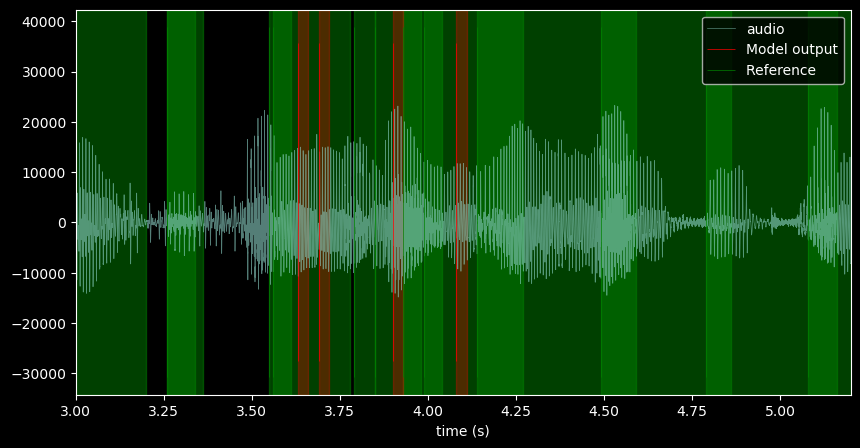

In [5]:
plt.figure(figsize=(10, 5))
tools.plot_intervals(audio, starts_all, stops_all, labels_df, Fs)
tr = (0, len(audio) / Fs)
tr = (3, 5.2)

plt.xlim(*tr)
plt.legend()
plt.show()

# Optimize

In [6]:
precision = {}
recall = {}

## Optimize volume

c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divi

Text(0.5, 0, 'Volume treshold')

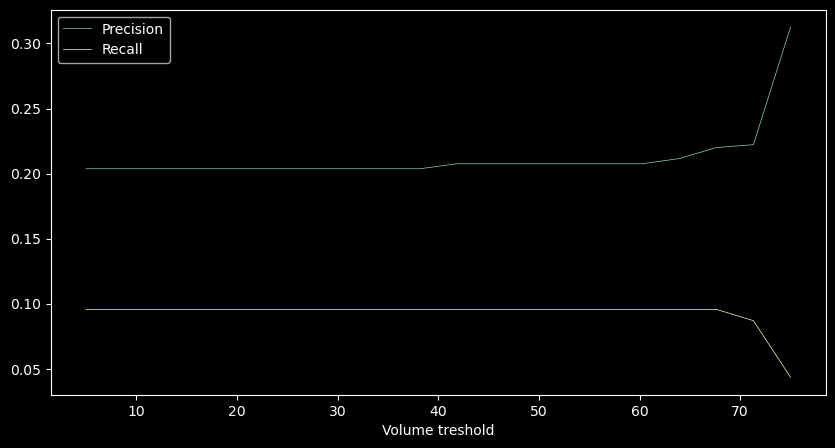

In [45]:
fl = int(0.02 * Fs)
volume = np.linspace(5,75,20)
precision["volume"] = []
recall["volume"] = []
for v in range(len(volume)):
    grouped_frames = tools.extract_vowels(
        words,
        audio,
        Fs,
        fl,
        add_context=False,
        long_frame=True,
        vol_thr = volume[v],
        print_info = False,
    )
    starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(grouped_frames, print_info = False)
    p, r = tools.score_vs_labels(
        starts_all, stops_all, labels_df, vowels=vowels_all, accept_partial=True, print_info = False
    )
    precision["volume"].append(p)
    recall["volume"].append(r)

plt.figure(figsize=(10, 5))
plt.plot(volume,precision["volume"])
plt.plot(volume, recall["volume"])
plt.legend(('Precision', 'Recall'))
plt.xlabel('Volume treshold')


## Optimize zero threshold

c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divi

Text(0.5, 0, 'Zero treshold')

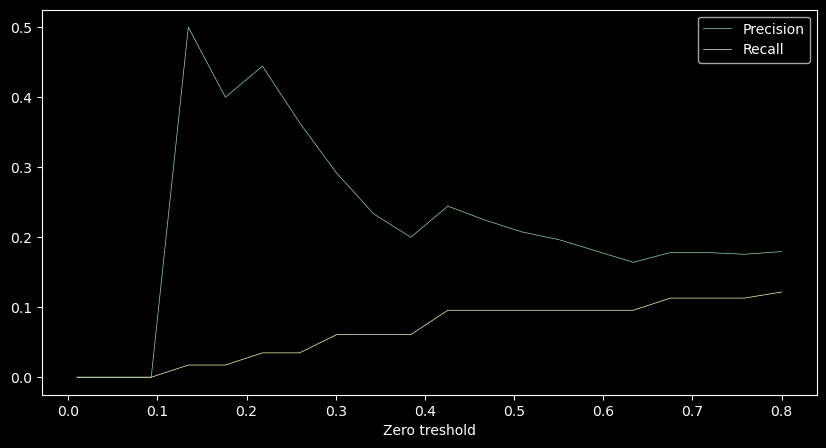

In [55]:
fl = int(0.02 * Fs)
zero = np.linspace(0.01,0.8,20)
precision["zero"] = []
recall["zero"] = []
for v in range(len(volume)):
    grouped_frames = tools.extract_vowels(
        words,
        audio,
        Fs,
        fl,
        add_context=False,
        long_frame=True,
        vol_thr = 50,
        print_info = False,
        zero_thr = zero[v]
    )
    starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(grouped_frames, print_info = False)
    p, r = tools.score_vs_labels(
        starts_all, stops_all, labels_df, vowels=vowels_all, accept_partial=True, print_info = False
    )
    precision["zero"].append(p)
    recall["zero"].append(r)

plt.figure(figsize=(10, 5))
plt.plot(zero,precision["zero"])
plt.plot(zero, recall["zero"])
plt.legend(('Precision', 'Recall'))
plt.xlabel('Zero treshold')


## Optimize frame length

c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: divide by zero encountered in divide
  r_x = r_a / r_w
c:\Users\tobia\anaconda3\Lib\site-packages\peakutils\peak.py:43: RuntimeWarning: invalid value encountered in scalar add
  thres = thres * (np.max(y) - np.min(y)) + np.min(y)
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )


Text(0.5, 0, 'Zero treshold')

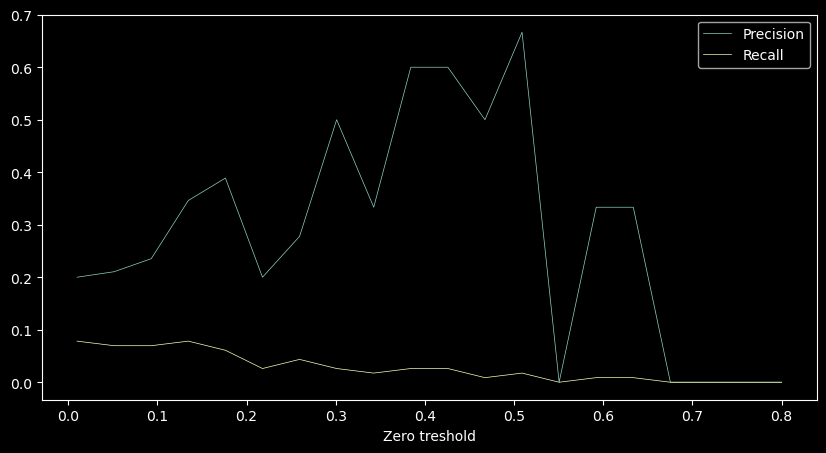

In [59]:
frame_length = np.int32(np.linspace(0.01,0.1,20)*Fs)
precision["fl"] = []
recall["fl"] = []
for v in range(len(volume)):
    grouped_frames = tools.extract_vowels(
        words,
        audio,
        Fs,
        fl = frame_length[v],
        add_context=False,
        long_frame=True,
        vol_thr = 50,
        print_info = False,
        zero_thr = 0.3
    )
    starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(grouped_frames, print_info = False)
    p, r = tools.score_vs_labels(
        starts_all, stops_all, labels_df, vowels=vowels_all, accept_partial=True, print_info = False
    )
    precision["fl"].append(p)
    recall["fl"].append(r)



Text(0.5, 0, 'Frame length [s]')

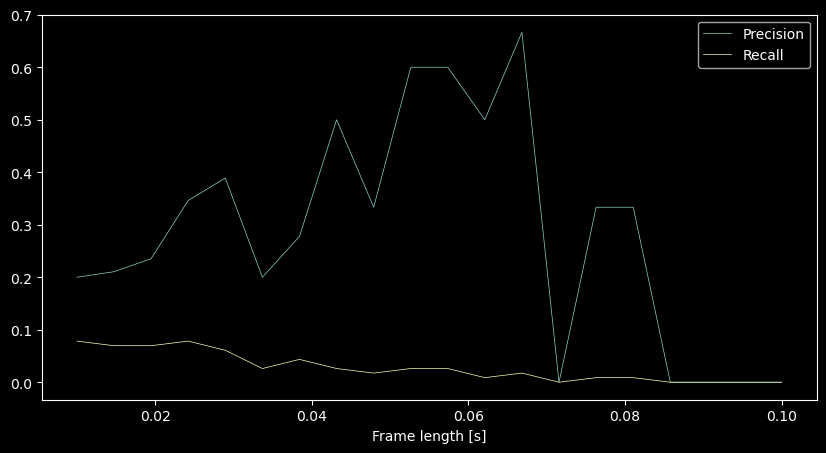

In [62]:

plt.figure(figsize=(10, 5))
plt.plot(frame_length/Fs,precision["fl"])
plt.plot(frame_length/Fs, recall["fl"])
plt.legend(('Precision', 'Recall'))
plt.xlabel('Frame length [s]')


## Optimize white noise

c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:587: RuntimeWarning: invalid value encountered in divide
  r_x /= r_x[ 0 ]
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:587: RuntimeWarning: invalid value encountered in divid

Text(0.5, 0, 'White threshold')

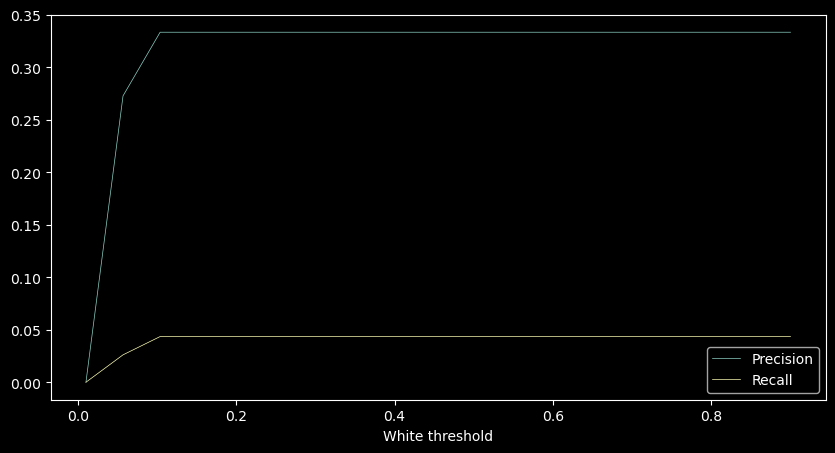

In [65]:
white = np.linspace(0.01,0.9,20)
precision["white"] = []
recall["white"] = []
for v in range(len(volume)):
    grouped_frames = tools.extract_vowels(
        words,
        audio,
        Fs,
        fl = int(0.03*Fs),
        add_context=False,
        long_frame=True,
        vol_thr = 50,
        print_info = False,
        zero_thr = 0.3,
        white_thr=white[v],
    )
    starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(grouped_frames, print_info = False)
    p, r = tools.score_vs_labels(
        starts_all, stops_all, labels_df, vowels=vowels_all, accept_partial=True, print_info = False
    )
    precision["white"].append(p)
    recall["white"].append(r)

plt.figure(figsize=(10, 5))
plt.plot(white,precision["white"])
plt.plot(white, recall["white"])
plt.legend(('Precision', 'Recall'))
plt.xlabel('White threshold')



## Optimize zero-threshold and frame length together

In [12]:
nbr = 20
zeros = np.linspace(0.1,0.4,20)
frames_len = np.int32(np.linspace(0.01,0.1,20)*Fs)
precision["zero_fl"] = np.zeros((len(zeros),len(frames_len)))
recall["zero_fl"] = np.zeros((len(zeros),len(frames_len)))

for row in range(len(zeros)):
    for col in range(len(frames_len)):
        grouped_frames = tools.extract_vowels(
        words,
        audio,
        Fs,
        fl = frames_len[col],
        add_context=False,
        long_frame=True,
        vol_thr = 50,
        print_info = False,
        zero_thr = zeros[row],
        white_thr=0.8,
    )
        starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(grouped_frames, print_info = False)
        p, r = tools.score_vs_labels(
            starts_all, stops_all, labels_df, vowels=vowels_all, accept_partial=True, print_info = False
        )
        precision["zero_fl"][row][col] = p
        recall["zero_fl"][row][col] = r

c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: divide by zero encountered in divide
  r_x = r_a / r_w
c:\Users\tobia\anaconda3\Lib\site-packages\peakutils\peak.py:43: RuntimeWarning: invalid value encountered in scalar add
  thres = thres * (np.max(y) - np.min(y)) + np.min(y)
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )
c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: divide by zero encountered in divide
  r_x = r_a / r_w
c:\Users\tobia\anaconda3\Lib\site-packages\peakutils\peak.py:43: RuntimeWarning: invalid value encountered in scalar add
  thres = thres * (np.max(y) - np.min(y

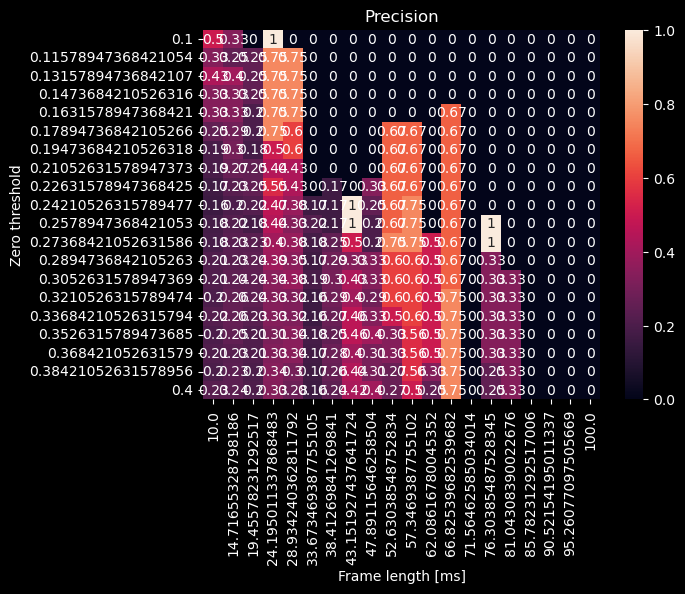

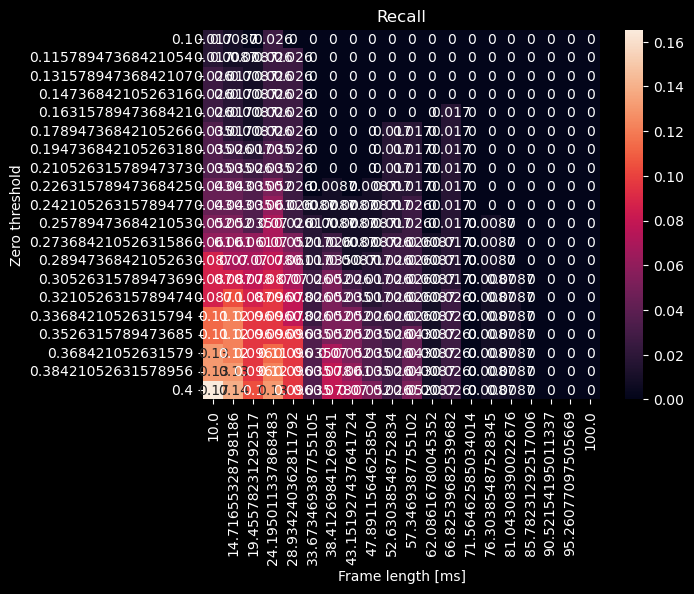

In [14]:
pd_precision = pd.DataFrame(precision["zero_fl"], columns=frames_len/Fs*1000,index = zeros)
pd_recall = pd.DataFrame(recall["zero_fl"], columns=frames_len/Fs*1000,index = zeros)
plt.figure()
sns.heatmap(pd_precision, annot=True)
plt.xlabel('Frame length [ms]')
plt.ylabel('Zero threshold')
plt.title('Precision')

plt.figure()
sns.heatmap(pd_recall, annot=True)
plt.xlabel('Frame length [ms]')
plt.ylabel('Zero threshold')
plt.title('Recall')

pd.DataFrame.to_csv(pd_precision, 'optimize/precision_matrix.csv')
pd.DataFrame.to_csv(pd_recall, 'optimize/recall_matrix.csv')



